In [1]:
import pandas as pd
import numpy as np
# import sqlite3
from numpy import meshgrid
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#Read data
bridge = pd.read_csv('CoverMyMeds_data/bridge.csv')
dim_claims = pd.read_csv('CoverMyMeds_data/dim_claims.csv')
dim_date = pd.read_csv('CoverMyMeds_data/dim_date.csv')
dim_pa = pd.read_csv('CoverMyMeds_data/dim_pa.csv')

In [7]:
#merge tables
dim = pd.merge(bridge, dim_claims, how="inner", on=["dim_claim_id"])
dim = pd.merge(dim, dim_date, how="left", on=["dim_date_id"])
dim = pd.merge(dim_pa,dim,how="left", on=["dim_pa_id"])

For each given combination of company, drug and rejection code, we train a logistic model to predict whether or not a pa will be approved based on 

In [13]:
RCode = []
for i in range(len(dim.reject_code.unique())):
    RCode.append(dim.reject_code.unique()[i])
RCode

[75.0, 76.0, 70.0]

In [14]:
Drug = []
for i in range(len(dim.drug.unique())):
    Drug.append(dim.drug.unique()[i])
Drug

['A', 'B', 'C']

In [15]:
Company = []
for i in range(len(dim.bin.unique())):
    Company.append(dim.bin.unique()[i])
Company

[417380, 417740, 999001, 417614]

We split the data according to time: we use the latest 0.25 data for test and the rest for training.

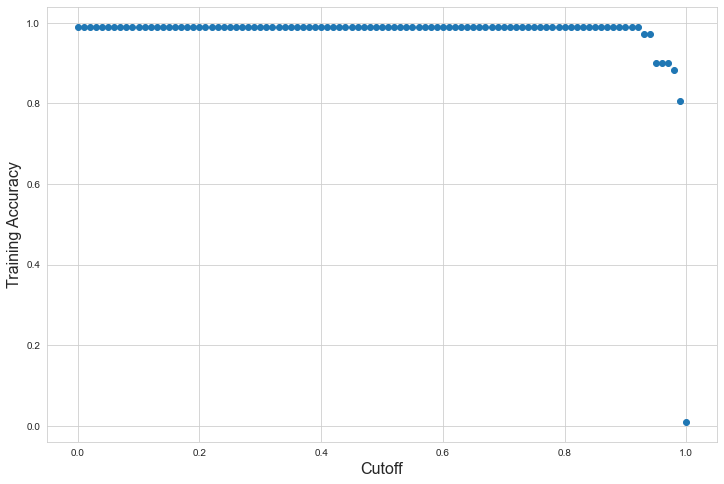

[[-0.17969518  0.1796415  -0.57253639  0.5724827   1.43012657 -1.43018025
   0.00909202 -0.00914571]]


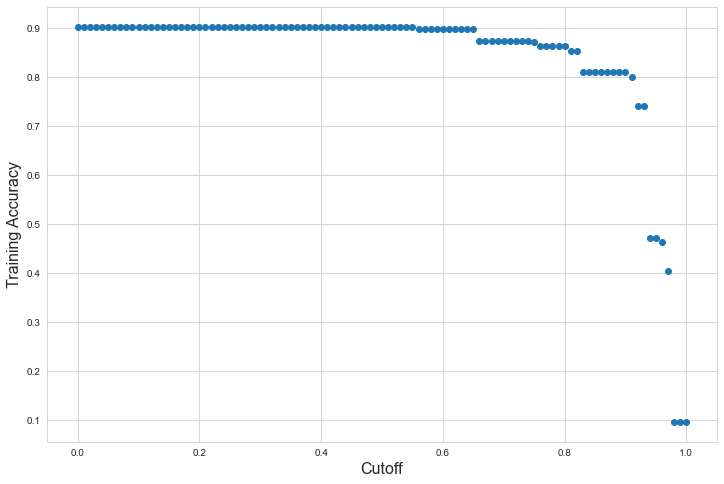

[[-0.19826567  0.19825386 -0.44374543  0.44373362  1.05667199 -1.05668381
  -0.03656439  0.03655258]]


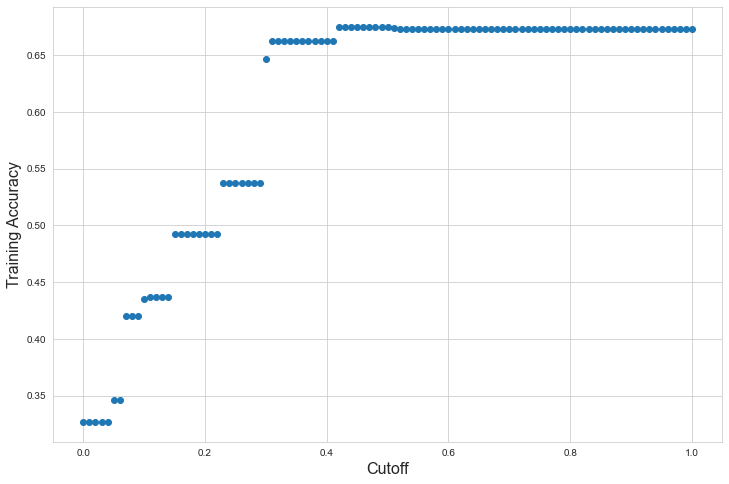

[[-0.196725    0.19667256 -0.44485102  0.44479857  0.92173957 -0.92179201
   0.01350424 -0.01355669]]


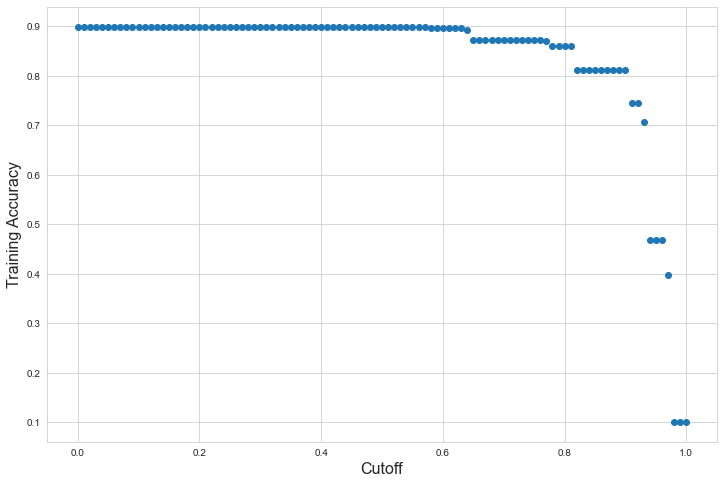

[[-0.14241389  0.14254652 -0.46757023  0.46770286  1.00524551 -1.00511288
  -0.01377818  0.01391081]]


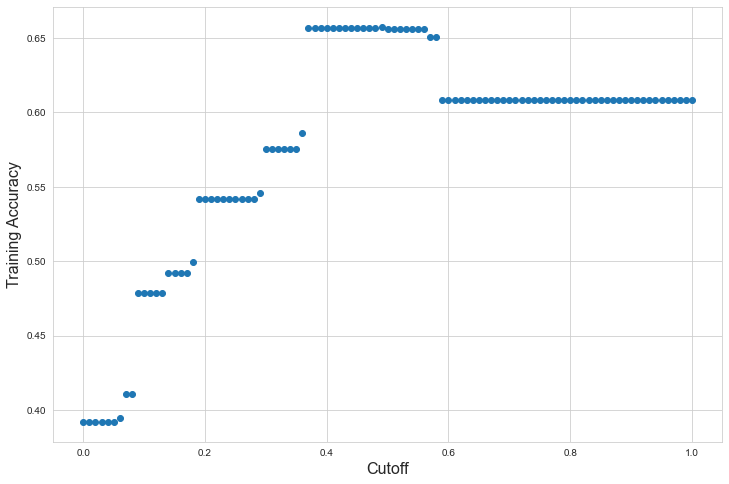

[[-0.37191189 -0.03283455 -0.64215962  0.23741317  0.71149614 -1.11624258
  -0.23183227 -0.17291417]]


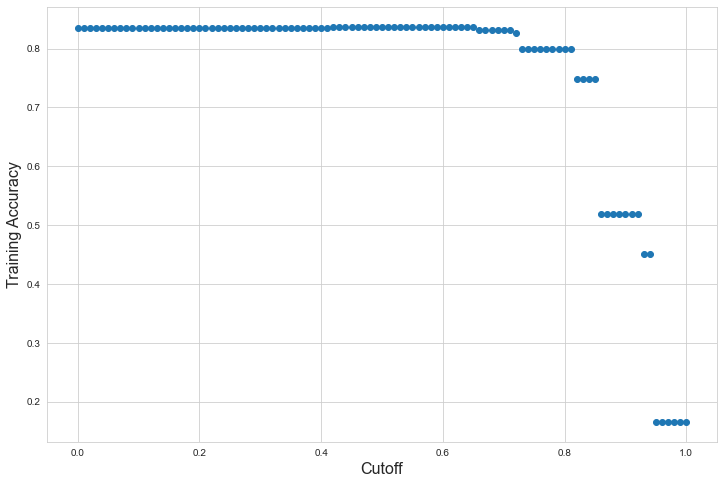

[[-0.14688398  0.14686502 -0.49360237  0.49358341  0.91580718 -0.91582615
  -0.0013482   0.00132924]]


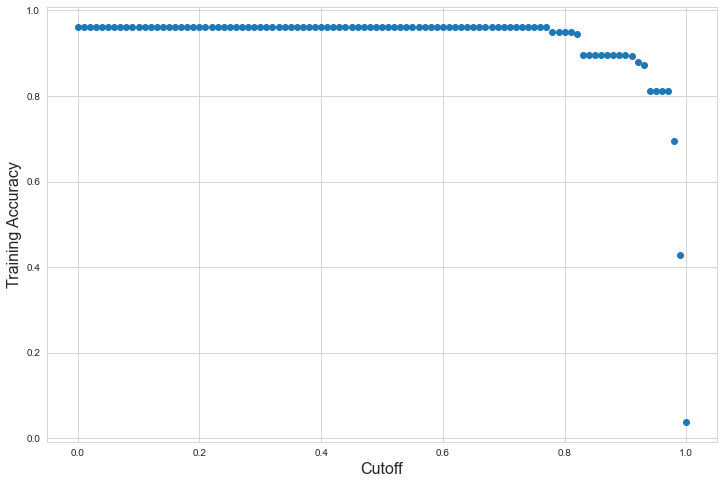

[[-0.14508185  0.1452878  -0.52902215  0.52922811  1.18681711 -1.18661116
  -0.03869474  0.0389007 ]]


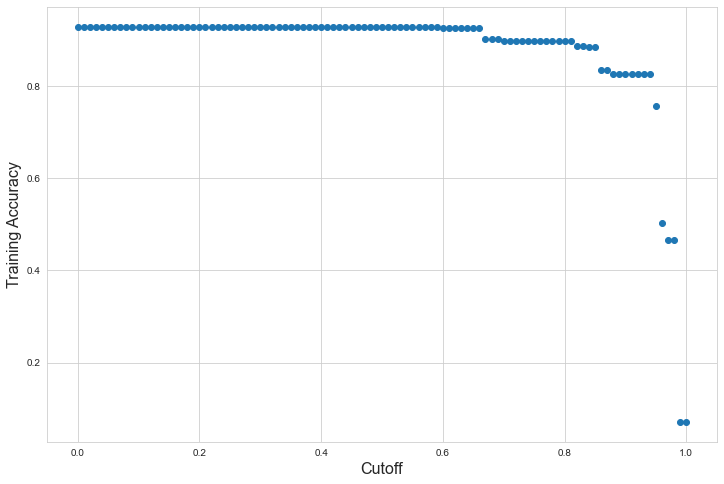

[[-0.15351453  0.15354641 -0.54118631  0.5412182   1.20609807 -1.20606619
   0.06215424 -0.06212236]]


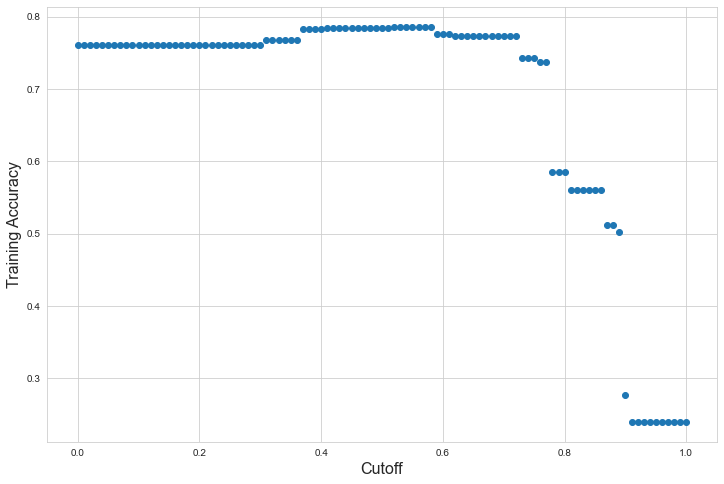

[[-0.1381602   0.13808154 -0.43110914  0.43103048  0.89676857 -0.89684723
   0.07968925 -0.07976791]]


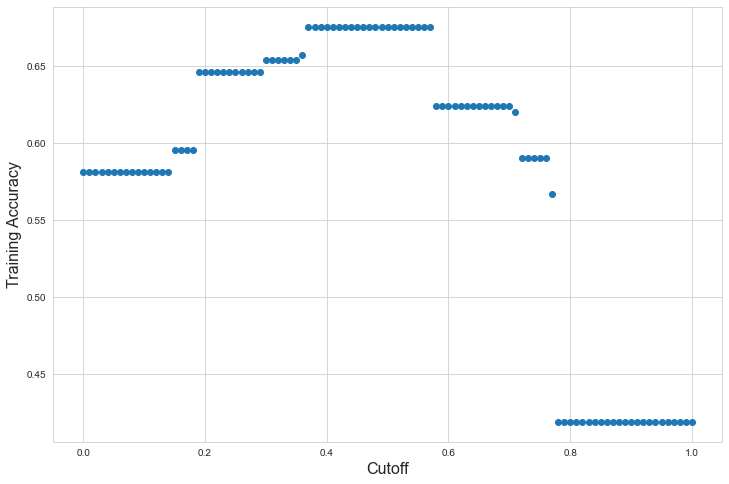

[[-0.1969759   0.10363369 -0.49266366  0.39932145  0.83746538 -0.93080759
  -0.05494044 -0.03840177]]


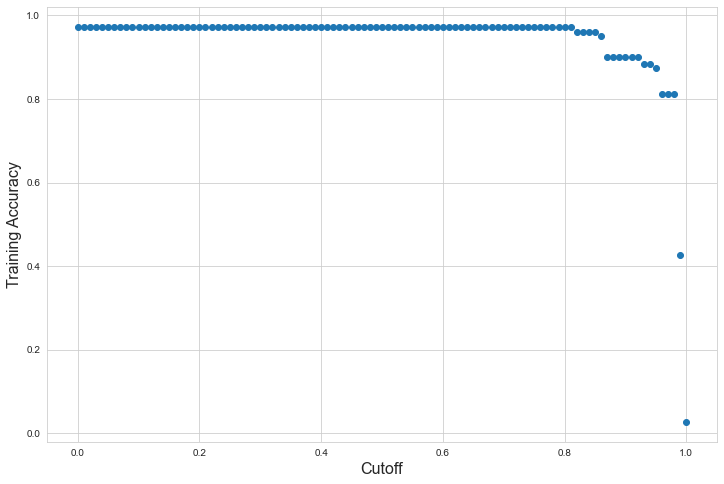

[[-0.19877014  0.19877161 -0.53411989  0.53412136  1.27680906 -1.27680759
  -0.05166733  0.0516688 ]]


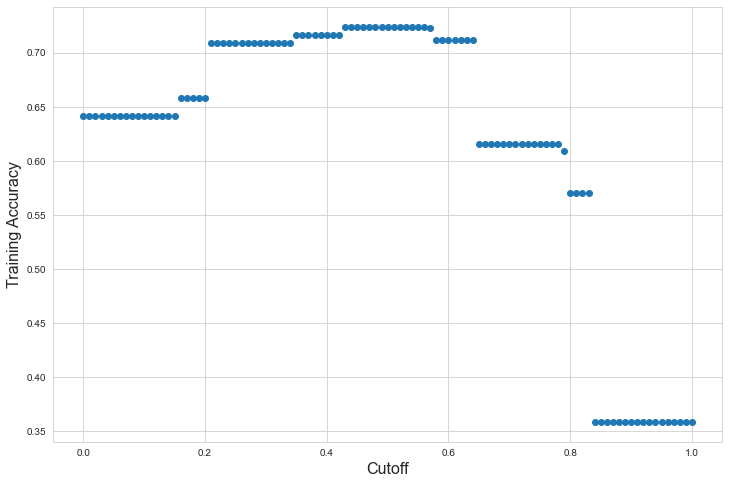

[[-0.16447546  0.15802135 -0.52500337  0.51854926  0.97199433 -0.97844844
  -0.01473545  0.00828134]]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
accs = []
cutoffs =  np.arange(0,1.01,.01)
for i in range(len(Company)):
    for j in range(len(Drug)):
        for k in range(len(RCode)):
            
            app = dim[(dim.bin==Company[i]) & (dim.drug==Drug[j]) & (dim.reject_code==RCode[k])]
            if app.empty:
                accs.append(-1)
                
            else:
                X = pd.get_dummies(data=app[['correct_diagnosis','tried_and_failed','contraindication','is_workday']], columns=['correct_diagnosis','tried_and_failed','contraindication','is_workday']).to_numpy()
                Y = app['pa_approved'].to_numpy()
                X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=False)
                log_reg = LogisticRegression()
                log_reg.fit(X_train, Y_train)
                X_train_prob = log_reg.predict_proba(X_train)[:,1]
                for cutoff in cutoffs:
                    Y_train_pred = 1*(X_train_prob>cutoff)
                    accs.append(np.sum(Y_train_pred==Y_train)/len(Y_train))
                plt.figure(figsize=(12,8))
                plt.scatter(cutoffs,accs)
                plt.xlabel("Cutoff",fontsize=16)
                plt.ylabel("Training Accuracy",fontsize=16)
                plt.show()
                print(log_reg.coef_)
            accs.clear()

Based on the previous figures, for all cases, we choose the cutoff value to be 0.5

In [19]:
accs = []
cutoff =  0.5
for i in range(len(Company)):
    for j in range(len(Drug)):
        for k in range(len(RCode)):
            
            app = dim[(dim.bin==Company[i]) & (dim.drug==Drug[j]) & (dim.reject_code==RCode[k])]
            if app.empty:
                accs.append(-1)
                
            else:
                X = pd.get_dummies(data=app[['correct_diagnosis','tried_and_failed','contraindication','is_workday']], columns=['correct_diagnosis','tried_and_failed','contraindication','is_workday']).to_numpy()
                Y = app['pa_approved'].to_numpy()
                X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=False)
                log_reg = LogisticRegression()
                log_reg.fit(X_train, Y_train)
                X_train_prob = log_reg.predict_proba(X_train)[:,1]
                Y_train_pred = 1*(X_train_prob>cutoff)
                accs.append(np.sum(Y_train_pred==Y_train)/len(Y_train))
                

In [20]:
accs

[0.9904014224579591,
 -1,
 -1,
 -1,
 0.9031382015691007,
 -1,
 -1,
 -1,
 0.6749057531552205,
 -1,
 0.8995315581854043,
 -1,
 -1,
 -1,
 0.6560955518945635,
 0.8364510814688845,
 -1,
 -1,
 -1,
 0.9621240100127211,
 -1,
 -1,
 0.9286586855607134,
 -1,
 -1,
 0.7846747325968788,
 -1,
 -1,
 -1,
 0.6754762635040725,
 0.9730741857864236,
 -1,
 -1,
 -1,
 0.7240730284208545,
 -1]